<a href="https://colab.research.google.com/github/miriamm172/TECNICAS-DE-CLASIFICACION/blob/master/%C3%81rboldeDesici%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ÁRBOL DE DESICIÓN** Ejemplo de clasificación de billetes en Python con Scikit-Learn: Predecir si un bille es falso o no de acuerdo a cuatro atributos. Utilizaremos el dataset bill_authentication.csv que consta de 1372 instancias y 5 atributos.

Importamos las bibliotecas necesarias y el conjunto de datos.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv("bill_authentication.csv")

Verificando los datos:

In [ ]:
print(dataset.shape)
dataset.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Dividimos los datos y los separamos en conjuntos de entrenamiento y prueba. "X" contiene los atributos, "y" la columna Class. El conjunto de entrenamiento es 80% y el de prueba 20%.

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Definimos del modelo de clasificacion utilizando "DecisionTreeClassifier()" y lo entrenamos con el conjunto de entrenamiento.

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predecimos los datos de prueba.

In [ ]:
y_pred = classifier.predict(X_test)

La eficacia del modelo de clasificacion la hallaremos utilizando la Matriz de confusión, la precisión, sensibilidad y la puntuación F1.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))
print('Metricas de clasificación:')
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[152   1]
 [  4 118]]
Metricas de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.97      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



*   True Positive 142
*   True Negative 129
*   False Psitive 4
*   False Negative 1

El clasificador tiene una precisión de 98%.

Visualizar el árbol de desición: utilizando la funcion "export_graphviz" que convierte el clasificador en un archivo de puntos y "pydotplus" genera el archivo en png.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


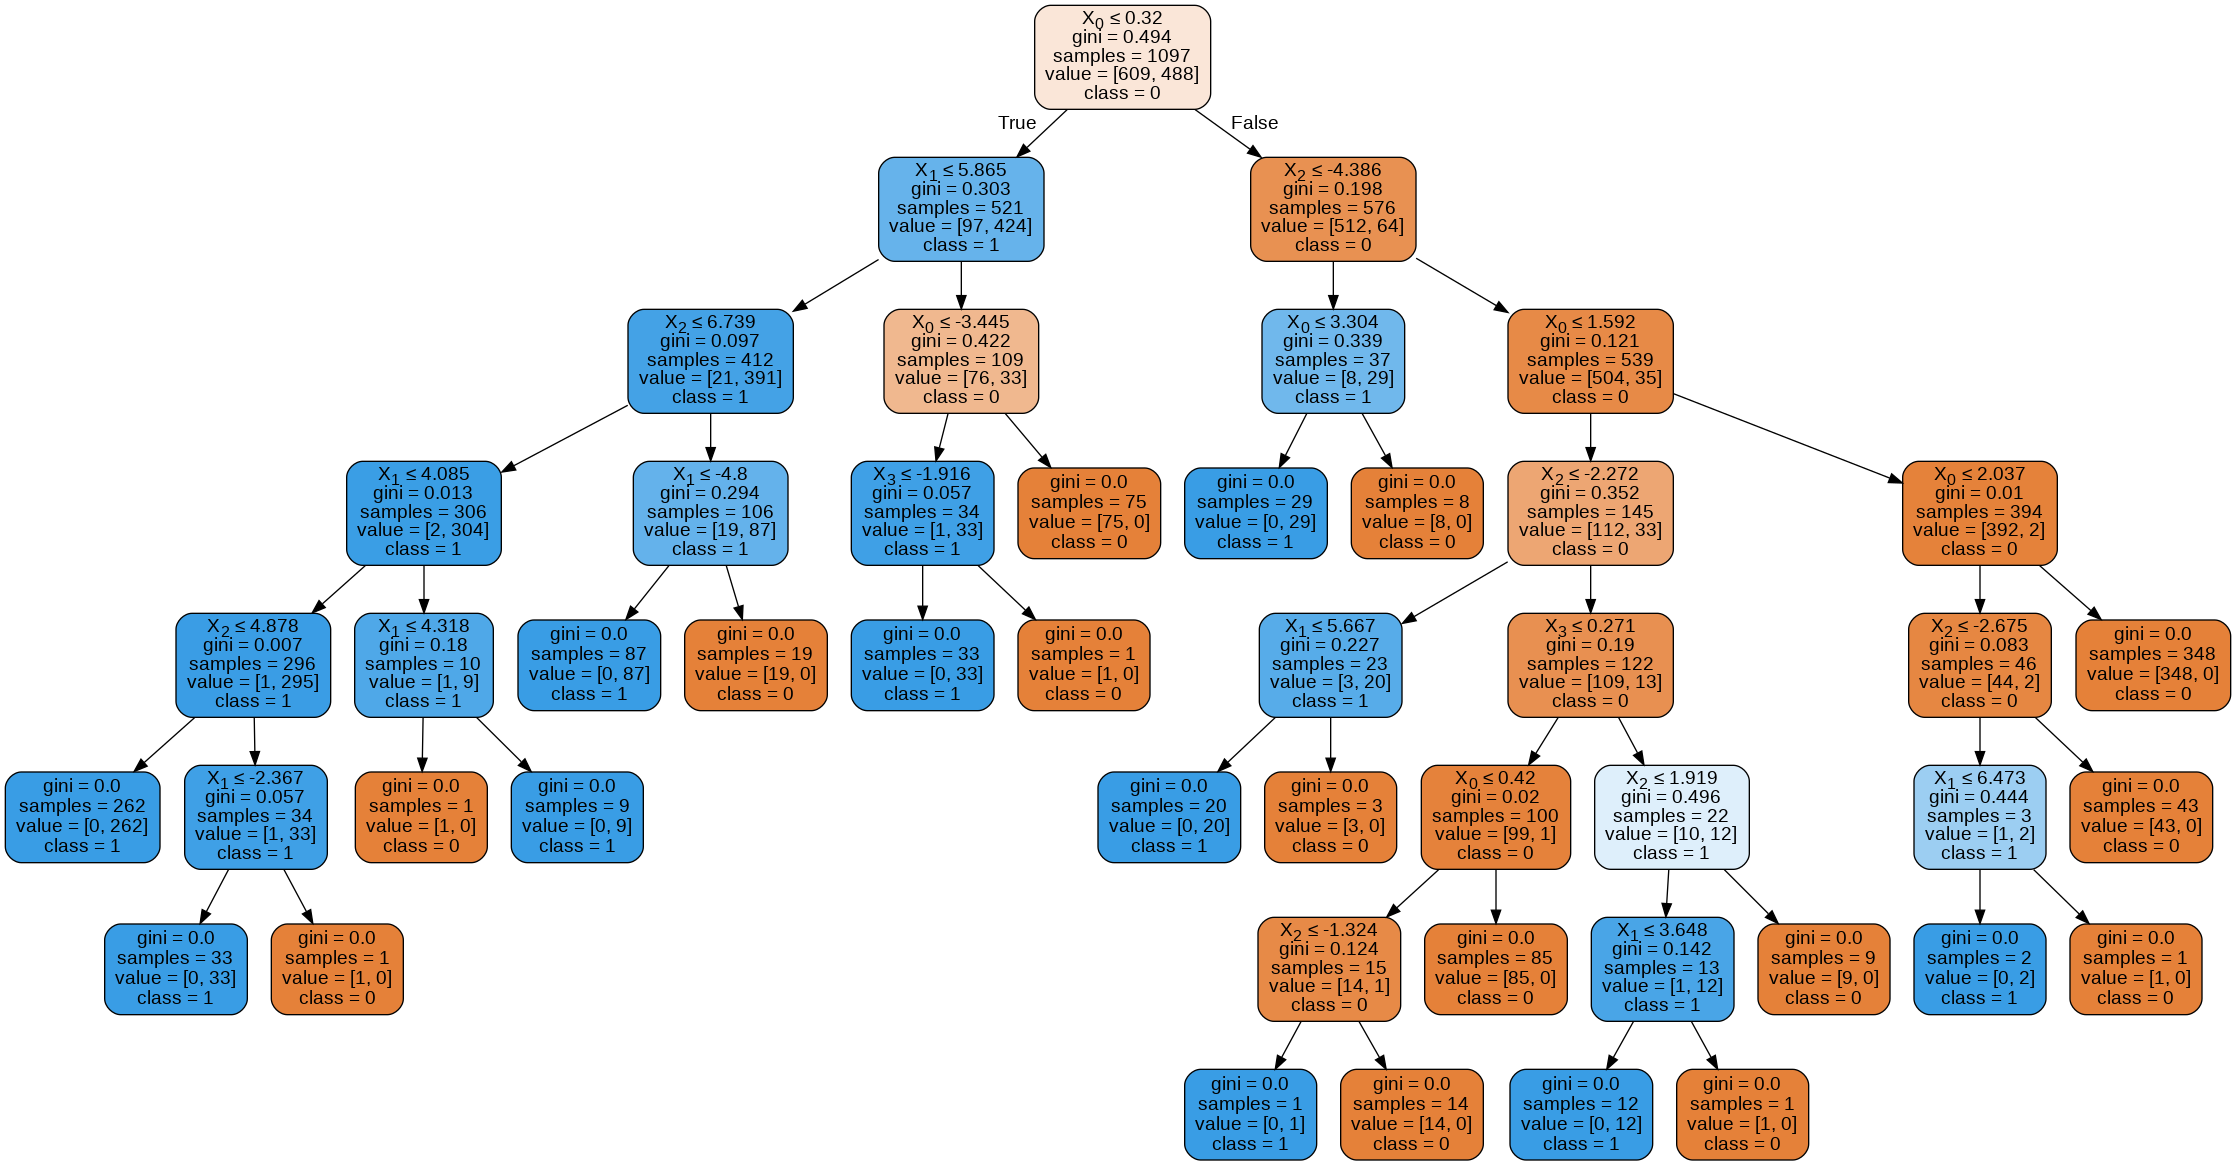

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Graficando el clasificador:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())